In [1]:
import nltk
import networkx as nx
import matplotlib.pyplot as plt
from nltk import pos_tag, word_tokenize, ne_chunk
from collections import defaultdict

In [2]:
nltk.download(['punkt', 'averaged_perceptron_tagger_eng', 'maxent_ne_chunker_tab', 'words'])

with open("./64/translated_output.txt", "r", encoding = "utf-8") as file:
    transcript = file.read()

[nltk_data] Downloading package punkt to /home/sohan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/sohan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /home/sohan/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /home/sohan/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
def extract_edges(text):
    edges = []
    sentences = nltk.sent_tokenize(text)
    
    for sent in sentences:
        chunks = ne_chunk(pos_tag(word_tokenize(sent)))
        entities = [
            ' '.join(c[0] for c in chunk) 
            for chunk in chunks if isinstance(chunk, nltk.Tree)
        ]
        
        for i in range(len(entities)):
            for j in range(i+1, len(entities)):
                edges.append((entities[i], entities[j]))
    
    return edges

In [4]:
G = nx.Graph()
edges = extract_edges(transcript)
G.add_edges_from(edges)

print("Nodes:", G.nodes())
print("Edges:", G.edges())

Nodes: ['Paramparik Dukan Hai', 'Apusa Digital Dukan Banana', 'AJ Isi Visha Param Hyper', 'Speaker B', 'Dekiham', 'Milta', 'APNA', 'Online Karna', 'Online', 'Delivery Khan Karega', 'Wambabas', 'Karakta']
Edges: [('Paramparik Dukan Hai', 'Apusa Digital Dukan Banana'), ('Paramparik Dukan Hai', 'AJ Isi Visha Param Hyper'), ('Apusa Digital Dukan Banana', 'AJ Isi Visha Param Hyper'), ('Speaker B', 'Dekiham'), ('Speaker B', 'Milta'), ('Speaker B', 'APNA'), ('Speaker B', 'Delivery Khan Karega'), ('Speaker B', 'Wambabas'), ('Speaker B', 'Karakta'), ('Dekiham', 'Milta'), ('Online Karna', 'Online'), ('Delivery Khan Karega', 'Wambabas'), ('Delivery Khan Karega', 'Karakta'), ('Wambabas', 'Karakta')]


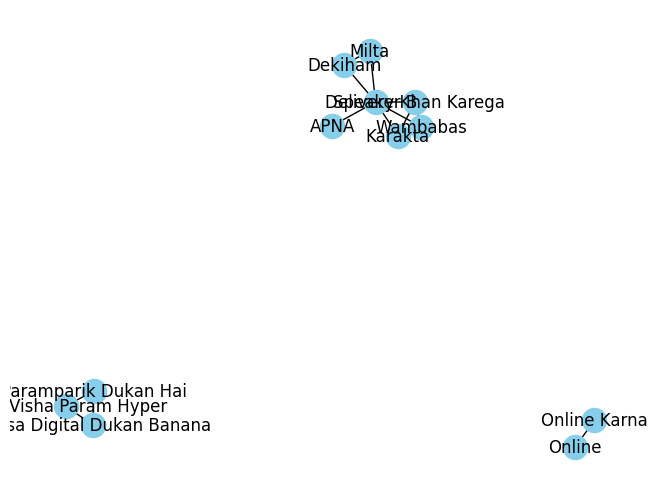

In [5]:
nx.draw(G, with_labels=True, node_color='skyblue')
plt.show()